# Homework 3: Conditioning and Stability

(Note that in this homework we use $\epsilon_m$ where the textbook uses $\epsilon_{\text{machine}}$ to save some keystrokes.)

In [1]:
import Pkg;  

In [2]:
Pkg.add("Plots");

    Updating registry at `/srv/julia/pkg/registries/General.toml`
   Resolving package versions...
   Installed Libtiff_jll ─ v4.3.0+1
   Installed LERC_jll ──── v3.0.0+1
┌ Warning: The active manifest file at `/home/jovyan/Manifest.toml` has an old format that is being maintained.
│ To update to the new format run `Pkg.upgrade_manifest()` which will upgrade the format without re-resolving.
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.7/Pkg/src/manifest.jl:287
  No Changes to `~/Project.toml`
    Updating `~/Manifest.toml`
  [88015f11] + LERC_jll v3.0.0+1
  [89763e89] ↑ Libtiff_jll v4.3.0+0 ⇒ v4.3.0+1
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/jovyan/Manifest.toml:0
Precompiling project...
  ✓ LERC_jll
  ✓ Libtiff_jll
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  5 dependencies successfully precompiled in 58 seconds (134 already precompiled

In [3]:
Pkg.add("Distributions"); Pkg.add("LaTeXStrings")

   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`


In [4]:
using LinearAlgebra; using Plots; default(fmt=:png); using Random, Distributions; using LaTeXStrings

**1 (T&B 12.3).** Consider two classes of random matrices.  The first class has entries that are independent samples from the real normal distribution with mean zero and standard distribution $m^{-1/2}$. (Note that julia's `randn` produces matrices like this, but the entries have standard distribution $1$.)  The second class of matrices are the same as the first but upper triangular.

**(a) [4%]** For the first class of matrices for $m = {8, 16, 32, \dots, 1024}$, create 10 random matrices.  Create four scatter plots:

1. A scatter plot of all of the eigenvalues of all the matrices in the complex plane on top of each other.

2. A scatter plot of the spectral radius $\rho(A)$ of all the matrices, separated so that the trend in $m$ can be seen.

3. A scatter plot of the 2-norms of all the matrices, separated so that the trend in $m$ can be seen.

4. A scatter plot of $\sigma_m$ of all the matrices, separated so that the trend in $m$ can be seen.

In the next question you will estimate any trends that may be present, so scale your plots appropriately.

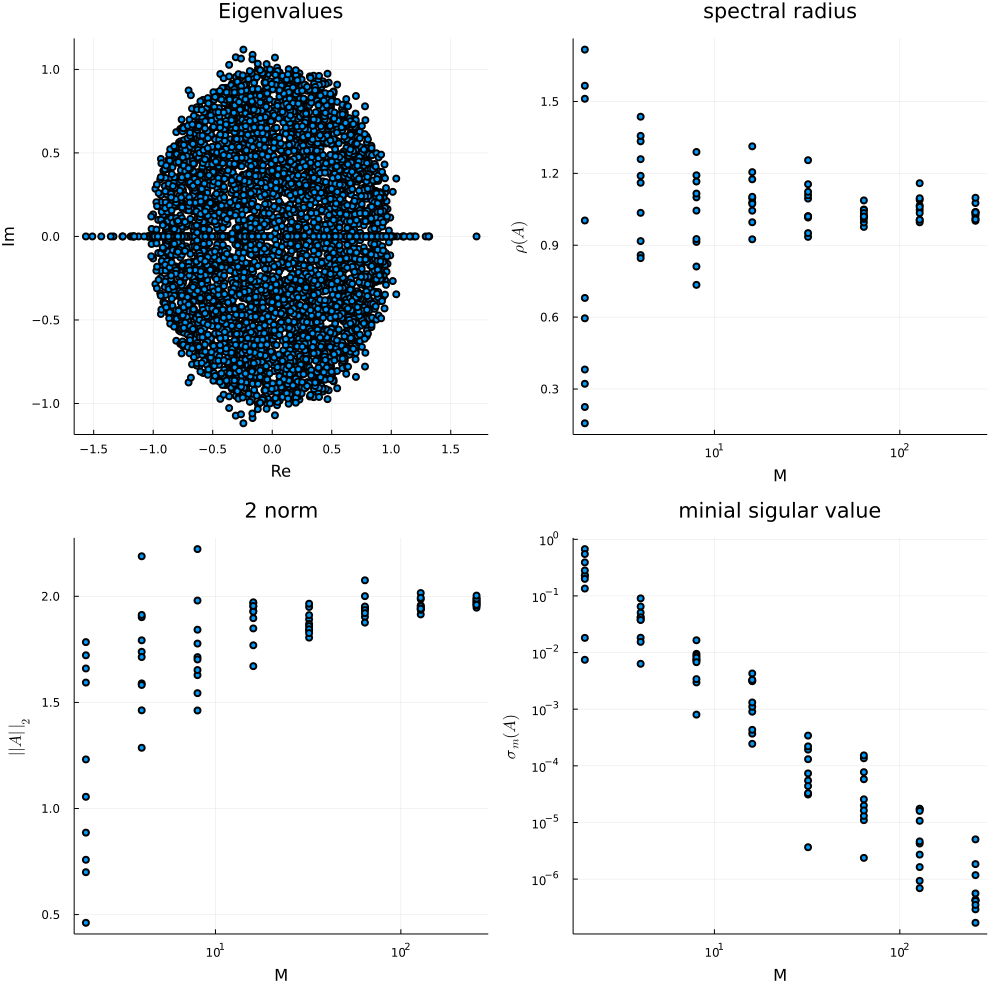

In [10]:
#v = Array{Array{Float64,2},8}()
x = Array{Int64,1}()
eig = []
rho = Array{Float64,1}()
nm2 = Array{Float64,1}()
sig = Array{Float64,1}()
#for i in 1:8:2?
for i in 1:8
    m = 2^i
    for j in 1:10
        A = rand(Normal(0,(m)^(-0.5)),m,m) 
        egg = eigvals(A)
        eig = [eig;egg]
        push!(rho,maximum(abs.(egg)))
        push!(nm2,opnorm(A))
        push!(sig,minimum(abs.(A)))
        
        push!(x,m)
    end
end

p1 = plot(real(eig), imag(eig), seriestype = :scatter, title = "Eigenvalues", label = "",xlabel = "Re",ylabel = "Im")
p2 = plot(x, rho, xaxis=:log,seriestype = :scatter, title = "spectral radius",label = "",xlabel = "M",ylabel = L"\rho (A)")
p3 = plot(x, nm2, xaxis=:log,seriestype = :scatter, title = "2 norm",xlabel = "M",label = "",ylabel = L"||A||_2")
p4 = plot(x, sig, xaxis=:log, yaxis=:log,seriestype = :scatter, title = "minial sigular value",xlabel = "M",label = "",ylabel = L"\sigma_m (A)")

plot(p1,p2,p3,p4, layout=(2,2),size = (1000,1000))


**(b) [3%]** Look at your plots from part (a) and estimate the trends of $\rho(A)$, $\|A\|_2$, and $\sigma_m(A)$. (If a value is convergening to a constant, what constant does it look like it's converging to?  If it is increasing or decreasing, is there a simple function of $m$ that it is behaving like?)

**Answer:**

The spectral radii of class 1 matrices seem to converge to 1 as size $m$ grows. Although for all $m$ it seems the average spectral radius is 1, given fixed $m$, the radii of all size $m$ matrices seem to deviate from $1$ less and less as $m$ grows.

The matrix 2 norm converges to 2 as $m$ grows, but distribution of $\|A\|_2$ across all $m$ seems to generally have an average value lower than 2, and such average $\|A|\_2$ of all $A$ in a fixed $m$ increases as $m$ towards 2. There doesn't seem to be a obvisou trend as a function of $m$ on log-log or linear-log scale.

For smallest singular value, we can see at every $m$ its distribution is rather uniform, and the average linearly decreases towards machine precision on a log-log scale as $m$ grows.

**(c) [4%]** Create four similar plots for the class of random upper triangular matrices described.  For the scatter plot of the eigenvalues, the eigenvalues will all be real, so do not plot them in the complex plane.  Instead, create a plot like your other three with the values separated by $m$ so that you can see the trend.

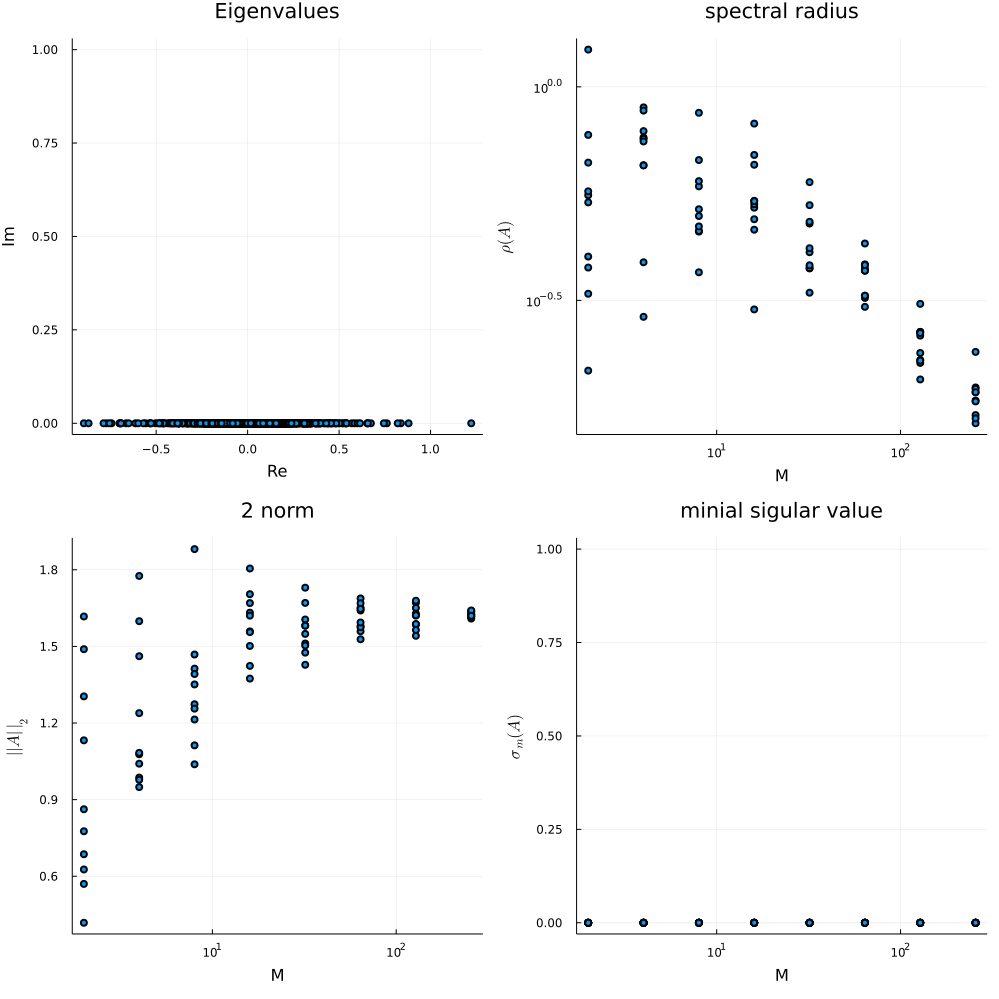

In [11]:
x = Array{Int64,1}()
eig = []
rho = Array{Float64,1}()
nm2 = Array{Float64,1}()
sig = Array{Float64,1}()
#for i in 1:8:2?
for i in 1:8
    m = 2^i
    for j in 1:10
        A = LowerTriangular(rand(Normal(0,(m)^(-0.5)),m,m) )
        egg = eigvals(A)
        eig = [eig;egg]
        push!(rho,maximum(abs.(egg)))
        push!(nm2,opnorm(A))
        push!(sig,minimum(abs.(A)))
        
        push!(x,m)
    end
end

p1 = plot(real(eig), imag(eig), seriestype = :scatter, title = "Eigenvalues", label = "",xlabel = "Re",ylabel = "Im")
p2 = plot(x, rho, xaxis=:log, yaxis =:log,seriestype = :scatter, title = "spectral radius",label = "",xlabel = "M",ylabel = L"\rho (A)")
p3 = plot(x, nm2, xaxis=:log,seriestype = :scatter, title = "2 norm",xlabel = "M",label = "",ylabel = L"||A||_2")
p4 = plot(x, sig, xaxis=:log, seriestype = :scatter, title = "minial sigular value",xlabel = "M",label = "",ylabel = L"\sigma_m (A)")

plot(p1,p2,p3,p4, layout=(2,2),size = (1000,1000))

**(d) [4%]** As in part (b), estimate the trends that you see in part (c). (If any of the values fall below $\epsilon_m$, see if you can estimate the trend from the data before that happens.)

**Answer:**

The spectral radii of class 2 matrices also have a more tight distribution as $m$ grows larger, however, the average $\rho (A)$ seems to linearly decrease as $m$ grows on a log-log scale towards machine precision.

The matrix 2 norm seems to converge to certain value between 1.6-1.7 as $m$ grows, and just like class 1 matrices,  average $\|A|\_2$ of all $A$ in a fixed $m$ increases as $m$ grows as it converge. There doesn't seem to be a obvisou trend as a function of $m$ on log-log or linear-log scale.

For smallest singular value, class 2 matrices consistently have a constant value of $0$ across all $m$.

**2 (T&B 13.3).** Consider the polynomial $p(x) = (x-2)^9 = x^9 - 18 x^8 + 144 x^7 - 672 x^6 + 2016x^5 - 4032 x^4 + 5376 x^3 - 4608 x^2 + 2304 x - 512.$

**(a) [3%]** Plot $p(x)$ on the points `x = 1.930:0.001:2.070`, evaluating $p$ via its coefficients $1$, $-18$, $\dots$.

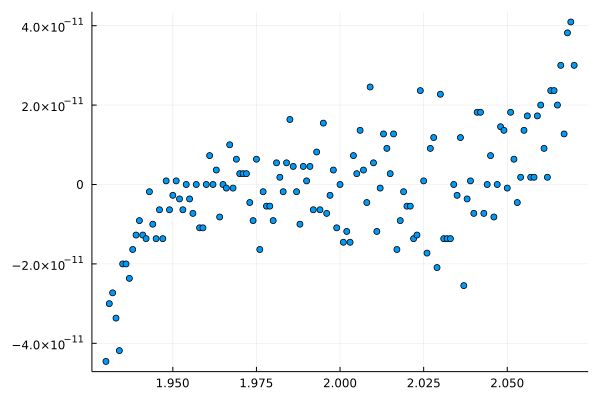

In [47]:
i = []
y = []
for x = 1.930:0.001:2.070
    a = x^9 - 18 *x^8 + 144* x^7 - 672 *x^6 + 2016*x^5 - 4032 *x^4 + 5376* x^3 - 4608* x^2 + 2304* x - 512
    push!(i,x)
    push!(y,a)
end
plot(i,y,seriestype = :scatter, label = "")

**(b) [3%]** Produce the same plot again, now evaluating $p$ via the expression $(x - 2)^9$.

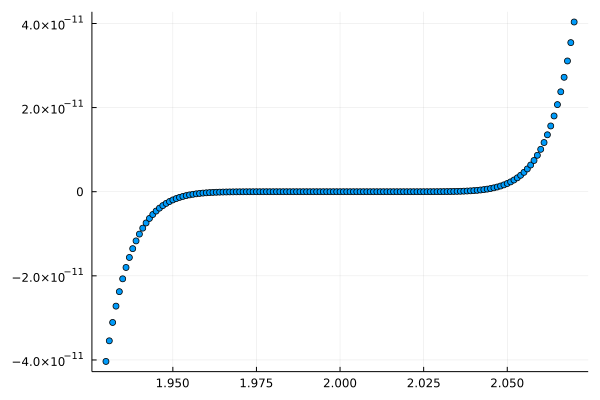

In [8]:
i = []
y = []
for x = 1.930:0.001:2.070
    a = (x-2)^9
    push!(i,x)
    push!(y,a)
end
plot(i,y,seriestype = :scatter, label = "")

**3 (T&B 14.2).** 

**(a) [6%]** Show that $(1 + O(\epsilon_m))(1 + O(\epsilon_m)) = 1 + O(\epsilon_m).$  
The precise meaning of this statement is that if $f$ is a function satisfying
$f(\epsilon_m) = (1 + O(\epsilon_m))(1 + O(\epsilon_m))$
as $\epsilon_m \to 0$,
then $f$ also satisfies $f(\epsilon_m) = 1 + O(\epsilon_m)$ as $\epsilon_m \to 0.$

**Answer:**

Equivalently we can say $f(\epsilon_m) = (1 + a)(1 + b)$, where $a,b\in O(\epsilon_m) $.
As per definition of $O(\epsilon_m)$, exists $C_a, \rho_a$ such that when $|\epsilon| \leq \rho_a$, $|a|\leq C_a|\epsilon|$, and similarly $C_b, \rho_b$ for $b$.

Then $f(\epsilon) = 1+a+b+ab$, we take $\rho = min(\rho_a,\rho_b,1), C = max(C_a,C_b)$ and we can claim $$|a+b+ab| \leq C_a|\epsilon|+C_b|\epsilon| + C_a|\epsilon|*C_b|\epsilon|\leq 3C|\epsilon|, $$ when $|\epsilon| \leq \rho.$ Therefore $f(\epsilon) \in 1+ O(\epsilon)$

**(b) [6%]** Show that $(1 + O(\epsilon_m))^{-1} = 1 + O(\epsilon_m).$

**Answer:**

$$(1 + O(\epsilon_m))^{-1} = \frac{1}{1 + O(\epsilon_m)} = 1 - \frac{O(\epsilon_m)}{1 + O(\epsilon_m)}$$

Again, we see the later term as $\frac{a}{1+a}$, where $a\in O(\epsilon)$ with $C_a,\rho_a$ according to the definition of big-O. 

So we choose $\rho = \min(\rho_a,\frac{1}{2C_a})$, such that when $|\epsilon|\leq\rho$,

$$|\frac{-a}{1+a}|\leq |C_a\cdot\frac{|\epsilon|}{1-C_a\frac{1}{2C_a}}|=2C_a\cdot|\epsilon|,$$

so apparently $\frac{-a}{1+a}\in O(\epsilon),$ and $(1 + O(\epsilon_m))^{-1} = 1 + O(\epsilon_m)$

**4.** When analyzing a computation that is the result of a large numbers of floating point operations, we often end up with expressions like

$$\hat{x} = x(1 + \delta_1)(1 + \delta_2)\cdots(1 + \delta_n),$$

where $x$ is the exact value and there have been $n$ relative errors $\delta_1, \dots, \delta_n$, each with magnitude $|\delta_i| \leq \epsilon_m$. An upperbound on the error is

$$\frac{|x - \hat{x}|}{|x|} \leq \underbrace{(1 + \epsilon_m)^n - 1}_{e_n(\epsilon_m)}.$$

**(a) [6%]** We could prove that the quantity $e_n(\epsilon_m)$ is $O(\epsilon_m)$, but we can do one better.  Show that $e_n(\epsilon_m) = n \epsilon_m + O(\epsilon_m^2).$

**Answer:**
$$e_n(\epsilon_m) = (1 + \epsilon_m)^n - 1 =  \sum_{i=0}^n \binom{n}{i}\epsilon^i  - 1 = n\epsilon + \epsilon^2\sum_{i=0}^{n-2} \binom{n}{i+2}\epsilon^i , $$
the later term in $O(\epsilon^2)$, since for any $\epsilon < 1$,
$$\epsilon^2\sum_{i=0}^{n-2} \binom{n}{i+2}\epsilon^i  < 2^n \epsilon^2$$

**(b) [6%]** The quantity $e_n(\epsilon_m)$ is hard to work with, and the asymptotic approximation $n\epsilon_m$ from part (a) is not an upper bound.

It turns out that an upper bound of $e_n(\epsilon_m)$ can be defined as

$$
\gamma_n(\epsilon_m) = \frac{n\epsilon_m}{1 - n\epsilon_m},$$

which is a good upper bound as long as $n \epsilon_m \ll 1.$

Prove that $\gamma_n(\epsilon_m) \geq e_n(\epsilon_m)$ whenever $n\epsilon_m < 1.$

**Answer:** 

We define $x = n\epsilon$, then given $x<1$, 
$$\gamma_n(\epsilon_m) = \sum^{\infty}_{i=1}x^i > \sum^{\infty}_{i=1}\frac{x^i}{i!} = e^x - 1.$$
All that's left to do is to prove $(1 + \epsilon_m)^n = (1+\frac{x}{n})^n \leq e^x$, observe the equality hold when $n \rightarrow \infty$, if we can prove the function $f(n) = (1+\frac{x}{n})^n$ is non-decreasing then we are done, which is true:
$$\frac{\text{d log}\ f(n)}{\text{d}x} = \text{log }(1+\frac{x}{n})-(1-\frac{1}{1+\frac{x}{n}}),$$
which we know if greater or equal to 1 given $y\text{log }y \geq y-1$, and if the function's derivative is non-decreasing, so is the funciton itself 

**c [3%]** Create a plot showing $e_n$ and $\gamma_n$ for $\epsilon_m$ for 32-bit floating point numbers for $n = 0$ to 1 million.

**5 bonus points.** Determine a rational function

$$
\eta_n(\epsilon_m) = \frac{n \epsilon_m}{\alpha_n + \beta_n \epsilon_m},
$$
where $\alpha_n$ and $\beta_n$ can be any functions of $n$, such that

$$\eta_n(\epsilon_m) \geq e_n(\epsilon_m), \quad \text{ whenever }\alpha_n + \beta_n \epsilon_m < 1,$$

and such that $\eta_n(\epsilon_m) - e_n(\epsilon_m) = O(\epsilon_m^3)$, and add $\eta_n$ to your plot.

In [ ]:
emach = Float64(eps(Float32))

In [ ]:
# your code here

**5 (T&B 15.2).** Consider an algorithm for the problem of computing the (full) SVD of a matrix.  The data for this problem is a matrix $A$, and the solution is three matrices $U$ (unitary), $\Sigma$ (diagonal), and $V$ (unitary) such that $A = U \Sigma V^*$.  (We are speaking here of explicit matrices $U$ and $V$, not implicit representations as products of reflectors.)

**(a) [3%]** Explain what it would mean for this algorithm to be backward stable.

**Answer:**

It means there exist some turbulence matrix $\delta A$ such that $\tilde{U}\tilde{\Sigma}\tilde{V}^* = A$, where $\tilde{U}\tilde{\Sigma}\tilde{V}^*$ are the solution computed via the algorithm given input data $A$, and that $\frac{\|\delta A\|}{\|A\|} = O(\epsilon)$ (since the true SVD, $f$, of a perturbed matrix $A+\delta A$ multiplies to be the matrix itself) 

**(b) [5%]** In fact, for a simple reason, this algorithm cannot be backward stable.  Explain.

**Answer**

Because the output of the algorithm is in space $\mathbb{C}^{m\times m}\otimes \mathbb{C}^{n} \otimes\mathbb{C}^{n \times n} $, obviously larger than input space $\mathbb{C}^{m\times n}$, as discussed in class, backward stability is rare with outspace larger than input

**(c) [5%]** Fortunately, the standard algorithms for computing the SVD are stable.  Explain what stability means for such an algorithm.

**Answer:**

It means $\frac{\| \tilde{U}\tilde{\Sigma}\tilde{V}^* - (A+\delta A)\|}{\|A+\delta A\|}\in O(\epsilon)$ for some pertubation matrix $\delta A$ such that $\frac{\|\delta A\|}{\|A\|}\in O(\epsilon)$

**6 (Inspired by T&B 16.1).** Let $Q$ and $A$ be $n \times n$ floating point matrices (meaning $Q = \mathrm{fl}(Q)$ and $A = \mathrm{fl}(A)$), and suppose $Q$ is unitary.  Define $f(A) = QA$ in exact arithmetic, and let $\tilde{f}(Q) = \mathrm{fl}(QA)$ computed in the straightforward way.

**(a) [7%]** Show that $\tilde{f}$ is accurate in the Frobenius norm,

$$\frac{\|\tilde{f}(A) - f(A)\|_F}{\|f(A)\|_F} = O(\epsilon_m).$$

You may use the backward stability of the inner product without proof.

**Answer:**
$$\frac{\|\tilde{f}(A) - f(A)\|_F}{\|f(A)\|_F} = \sum_{i,j}\sqrt{|\frac{\mathrm{fl}(QA)_{ij} - QA_{ij}}{QA_{ij}}|^2}$$
For each $i,j$: 
$$\frac{\mathrm{fl}(QA)_{ij} - QA_{ij}}{QA_{ij}} = \frac{\mathrm{fl}(Q(i,:)*A(:,j)) - Q(i,:)*A(:,j)}{Q(i,:)*A(:,j)} = \frac{Q(i,:)*(A(:,j) + \delta v) - Q(i,:)*A(:,j)}{Q(i,:)*A(:,j)} = \frac{Q(i,:)* \delta v}{Q(i,:)*A(:,j)}$$
for some perturbation $\delta$ such that $\frac{\|\delta v\|}{\|A(:,j)\|}\in O(\epsilon)$, according to backward stability of inner product.

We denote the entry with maximal absolute value in $Q(i,:)$ as $Q_{max}$, and similarly $Q_{min}$, and the constant ratio $r=\frac{Q_{max}}{Q_{min}}$. It is easy to see that 
$$\frac{\|Q(i,:)* \delta v\|}{\|Q(i,:)*A(:,j)\|} \leq \|r\|O(\epsilon) \in O(\epsilon)$$
as per definition of big-O.

Likewise, since above relation holds for each entry, the summation of all numerators over summation of all denominators will also be $O(\epsilon)$ 

**(b) [7%]** Use your answer from part (a) to show that $\tilde{f}$ is backward stable.

_Hint._ Use $Q^*(\tilde{f}(A) - f(A))$.

**Answer:**

Given $\tilde{f}(A) = f(A+\delta A),$ we seek to prove $\frac{\|\delta A\|}{\|A\|}\in O(\epsilon)$. It is easy to see $f$ is distributive, so $f(A+\delta A) = f(A) + f(\delta A).$ Thus we can rewrite the backward stability relation as 
$$\mathrm{fl}(QA) = QA + Q\delta A,$$ $$Q^*[\tilde{f}(A) - f(A)] =  \delta A,$$ given Q is unitary.


So 
$$\frac{\|\delta A\|}{\|A\|} = \frac{\|\tilde{f}(A) - f(A)\|}{\|A\|} (\text{Norm conservation of }Q) $$
with norm equivalence I'm using Frobenius norm $\|\|_F$ and other general norms $\|\|$ interchangably, then
$$O(\epsilon)\frac{\|f(A)\|}{\|A\|} = O(\epsilon) \frac{\|QA\|}{\|A\|} = O(\epsilon)$$

**7 (T&B 18.2). [10%]** Social scientists depend on the technique of _regression_, in which a vector of observations of some quantity is approximated in the least squares sense by a linear combination of other vectors. The coefficients of the fit are then interpreted as representing, say, the effects on annual income of IQ, years of education, parents' years of education, and parents' income.

One might think that the more variables one included in such model, the more information one would obtain, but this is not always true.  Explain this phenomenon from the point of view of conditioning, making specific reference to the results of T&B Theorem 18.1.

> **T&B Theorem 18.1.** Let $b \in \mathbb{C}^m$ and $A \in \mathbb{C}^{m \times n}$ of full rank be fixed. The least squares problem $\min_x \|b - Ax\|$ has the following 2-norm relative condition numbers describing the sensitivities of $y$ and $x$ to perturbations in $b$ and $A$:
$$\begin{array}{c|c|c|}
 & y & x \\ \hline
b & \frac{1}{\cos \theta} & \frac{\kappa(A)}{\eta \cos \theta} \\ \hline
A & \frac{\kappa(A)}{\cos \theta} & \kappa(A) + \frac{\kappa(A)^2\tan\theta}{\eta} \\ \hline
\end{array}.
$$
Here $\kappa(A) = \|A\|\|A^+\|$, $\theta = \cos^{-1} \frac{\|y\|}{\|b\|}$, $y$ is the projection of $b$
onto the range of $A$, and $\eta = \|A\|\,\|x\| / \|y\|.$
The results in the first row are exact, being attained for certain perturbations $\delta b$, and the results in the second row are upper bounds.

**Answer:**

As more columns are added into $A$, $\text{range}(A)$ grows, and $\theta$ will likely become smaller as distance between a higher dimension $\text{range}(A)$ gets closer to $b$. But on the other hand, unless all new and existing columns are orthogonal to each other, it is inevitable that some column will get closer to some subspace formed by other columns, making $A$ closer to being singular, resulting in a larger condition number $\kappa(A)$. 

With $\eta$ fixed, a smaller $\theta$ hence smaller (closer to 0) $\frac{1}{\cos \theta}$ will surely make the perturbation of $y$ and $x$ smaller in presence of noise in $b$ and $A$, but only to a limited extent since $\cos \theta$ cannot be greater than 1. On the other hand, with sensitivity of $x$ w.r.t. change in $b \geq \frac{\kappa(A)}{\eta}$ and w.r.t. $A \geq \kappa(A)$, as $\kappa(A)$ grows larger, the perturbation of solution $x$ will inevitably grow larger given the large condition number resulted from near singular matrix. Therefore, the least squares algorithm is not necessarily stable with more features added

**8 (Based on Example from T&B Lecture 19).** Lecture 19 says that using modified Gram-Schmidt to solve the least squares problem _directly_ -- forming $\hat{Q}$ and $\hat{R}$ and computing $x \gets R \backslash Q^* b$ --
is unstable, but solving it _implicitly_ -- forming a reduced QR factorization $\tilde{Q}, \tilde{R}$ of the _augmented_ matrix
$[A | b]$, and computing $x \gets \tilde{R}_{1:n,1:n} \backslash \tilde{Q}_{1:n,n+1}$ --- is backward stable.

In this problem you will demonstrate this difference.

An implementation of modified Gram-Schmidt to compute a reduced QR factorization is provided.

In [5]:
function mgs(A)
    """
    Compute and return the QR factorization of `A` by Modified Gram-Schmidt procedure.

    # Arguments
    
    - `A`: m × n matrix (m ≥ n) to factor

    # Returns

    - `Q`: m × n matrix with orthonormal columns spanning range(A) 
    - `R`: n × n upper triangular matrix, coefficients of columns of `A` 
           in the basis of `Q`
    """
    _, n = size(A)
    Q = copy(A)
    R = zeros(eltype(A), n, n)
    for i in 1:n
        R[i,i] = norm(Q[:,i])
        Q[:,i] /= R[i,i]
        R[i,i+1:n] = Q[:,i]' * Q[:,i+1:n]
        Q[:,i+1:n] -= Q[:,[i]] * R[[i],i+1:n]
    end
    return Q, R
end

mgs (generic function with 1 method)

The function `generate_ls_problem` creates a least squares problem instance for testing.  It takes as inputs the size of $A$, as well as the factors that control the relative errors of $x$ and $y = Pb$:

- The condition number $\kappa(A)$
- The angle $\theta$ of $b$ to $\mathrm{range}(A)$ 
- The ratio $\eta$ of $\|x\|$ to $\|y\|$

In [6]:
function generate_ls_problem(m, n, κ, θ, η)
    """
    Create a random least squares problem with the desired conditioning factors
    
    # Arguments
    
    - `m`, `n`: the dimensions of the least squares problem
    - `κ`: the 2-norm condition number of `A`
    - `θ`: the angle of `b` to range(A)
    - `η`: the ratio of ||x|| to ||y||
    
    # Returns
    
    - `A`: the system matrix
    - `x`: the solution vector
    - `r`: the residual vector
    
    Compute `y = A*x` and `b = y + r` to construct the right hand side of the least squares problem
    """
    @assert(m >= n)
    @assert(κ >= 1.0)
    @assert(η >= 1.0 && κ >= η)
    
    # generate a random square matrix with the desired
    # condition number
    σ = LinRange(1.0, 1.0 / κ, n)
    U = qr(randn(n,n)).Q
    V = qr(randn(n,n)).Q
    A = zeros(m, n)
    A[1:n,1:n] = U * diagm(σ) * V'
    
    # create a solution vector with norm η cos θ
    x = zeros(n)
    ϕ = 1 / η
    # spread the support of x out widely over the singular vectors
    # pairing large and small singular values appropriately scaled
    # to guarantee ||x|| = η ||y||
    for i = 1:div(n,2)
        s = σ[i]
        t = σ[end-(i-1)]
        if (s >= ϕ && t <= ϕ)
            if s == t
                x[i] = 1.
                x[end-(i-1)] = 1.
            else
                c = (ϕ+t)*(ϕ-t)/(s+t)/(s-t)
                x[i] = sqrt(c)
                x[end-(i-1)] = sqrt(1 - c)
            end
        end
    end
    x = V * x
    # normalize x so that ||y|| = 1
    xnorm = norm(x)
    x *= η / xnorm
    
    # set up a right hand side where ||b|| = 1 and ||y = Pb|| = cos θ
    c = cos(θ)
    s = sin(θ)
    # rescale x so ||y|| = cos θ
    x *= c
    r = zeros(m)
    # put sin θ in the last component (this will be the residual r)
    r[end] = s
    
    # randomly rotate the columns
    Q = qr(randn(m,n)).Q
    A = Q'*A
    r = Q'*r
    
    return A, x, r
end

generate_ls_problem (generic function with 1 method)

**(a) [6%]** Implement a function that solves the least squares problem directly as described above.

In [7]:
function solve_ls_mgs_direct(A, b)
    """
    Solve minₓ ||Ax - b||₂ by direct application of modified Gram-Schmidt
    
    # Arguments
    
    - `A`: system matrix
    - `b`: right-hand side
    
    # Returns
    
    - `x`: the computed solution vector
    - `y`: the projection `Pb` of `b` onto the range of `A`
    """
    # your code here
    (Q,R) = mgs(A);
    #print(size(Q));
    #print(size(R));
    x = R\Q'*b;
    y = A*x;
    
    return x, y
end

solve_ls_mgs_direct (generic function with 1 method)

In [82]:
# Test solve_ls_mgs_direct on a random well-conditioned problem

m = 100; n = 15; κ = 10; θ = π / 20; η = κ / 2;
A, x, r = generate_ls_problem(m, n, κ, θ, η)
y = A * x
b = r + y
x_dir, y_dir = solve_ls_mgs_direct(A, b)
x_rel_err = norm(x_dir - x) / norm(x)
y_rel_err = norm(y_dir - y) / norm(y)

display("Solution by direct MGS: (x, y) relative errors: ($x_rel_err, $y_rel_err)")
@assert(x_rel_err < 100 * eps())
@assert(y_rel_err < 100 * eps())

"Solution by direct MGS: (x, y) relative errors: (6.908176136219222e-16, 6.742519913971031e-16)"

In [21]:
# Test solve_ls_mgs_direct on a moderately-conditioned problem with η = κ: stability is not a concern yet

m = 100; n = 15; κ = 1.e6; θ = π / 20; η = κ;
A, x, r = generate_ls_problem(m, n, κ, θ, η)
y = A * x
b = r + y
x_dir, y_dir = solve_ls_mgs_direct(A, b)
x_rel_err = norm(x_dir - x) / norm(x)
y_rel_err = norm(y_dir - y) / norm(y)

display("Solution by direct MGS: (x, y) relative errors: ($x_rel_err, $y_rel_err)")
@assert(x_rel_err < 100 * κ * eps())
@assert(y_rel_err < 100 * κ * eps())

"Solution by direct MGS: (x, y) relative errors: (3.429830145706527e-12, 1.097609192264621e-10)"

In [22]:
# Test solve_ls_mgs_direct on an ill-conditioned problem with η = 2, and a small θ: should be unstable

m = 100; n = 15; κ = 1.e10; θ = 1.e-6; η = 2;
A, x, r = generate_ls_problem(m, n, κ, θ, η)
y = A * x
b = r + y
x_dir, y_dir = solve_ls_mgs_direct(A, b)
x_rel_err = norm(x_dir - x) / norm(x)
y_rel_err = norm(y_dir - y) / norm(y)

display("Solution by direct MGS: (x, y) relative errors: ($x_rel_err, $y_rel_err)")
@assert(x_rel_err > 1.0)
@assert(y_rel_err < 100 * κ * eps())

"Solution by direct MGS: (x, y) relative errors: (428.38796253074577, 2.3722268919166078e-7)"

**(b) [6%]** Now implement a function that solve the least squares problem implicitly as described above.

In [8]:
function solve_ls_mgs_implicit(A, b)
    """
    Solve minₓ ||Ax - b||₂ by implicit application of modified Gram-Schmidt to the augmented system [A|b]
    
    # Arguments
    
    - `A`: system matrix
    - `b`: right-hand side
    
    # Returns
    
    - `x`: the computed solution vector
    - `y`: the projection `Pb` of `b` onto the range of `A`
    """
    # your code here
    
    dim = size(A,2) 
    
    a = hcat(A,b);
    (Q,R) = mgs( a );
    
    #print(size(Q))
    #print(size(R))
    #print(dim)
    x = R[1:dim,1:dim]\R[1:dim,dim+1];
    y = A*x;
    
    
    return x, y
end

solve_ls_mgs_implicit (generic function with 1 method)

In [86]:
# Test solve_ls_mgs_implicit on a random well-conditioned problem

m = 100; n = 15; κ = 10; θ = π / 20; η = κ / 2;
A, x, r = generate_ls_problem(m, n, κ, θ, η)
y = A * x
b = r + y
x_dir, y_dir = solve_ls_mgs_implicit(A, b)
x_rel_err = norm(x_dir - x) / norm(x)
y_rel_err = norm(y_dir - y) / norm(y)

display("Solution by implicit MGS: (x, y) relative errors: ($x_rel_err, $y_rel_err)")
@assert(x_rel_err < 100 * eps())
@assert(y_rel_err < 100 * eps())

"Solution by implicit MGS: (x, y) relative errors: (3.891025003608313e-16, 6.256664261747602e-16)"

In [87]:
# Test solve_ls_mgs_implicit on a moderately-conditioned problem with η = κ: still stable

m = 100; n = 15; κ = 1.e6; θ = π / 20; η = κ;
A, x, r = generate_ls_problem(m, n, κ, θ, η)
y = A * x
b = r + y
x_dir, y_dir = solve_ls_mgs_implicit(A, b)
x_rel_err = norm(x_dir - x) / norm(x)
y_rel_err = norm(y_dir - y) / norm(y)

display("Solution by implicit MGS: (x, y) relative errors: ($x_rel_err, $y_rel_err)")
@assert(x_rel_err < 100 * κ * eps())
@assert(y_rel_err < 100 * κ * eps())

"Solution by implicit MGS: (x, y) relative errors: (9.494806574249265e-12, 8.901556924643507e-11)"

In [88]:
# Test solve_ls_mgs_implicit on an ill-conditioned problem with η = 2, and a small θ: still stable
m = 100; n = 15; κ = 1.e10; θ = 1.e-6; η = 2;
A, x, r = generate_ls_problem(m, n, κ, θ, η)
y = A * x
b = r + y
x_dir, y_dir = solve_ls_mgs_implicit(A, b)
x_rel_err = norm(x_dir - x) / norm(x)
y_rel_err = norm(y_dir - y) / norm(y)

display("Solution by implicit MGS: (x, y) relative errors: ($x_rel_err, $y_rel_err)")
@assert(x_rel_err < 100 * m * n * κ * eps())
@assert(y_rel_err < 100 * κ * eps())

"Solution by implicit MGS: (x, y) relative errors: (0.0001396434341886987, 2.7911079236694947e-14)"

**(c) [4%]** Create two plots, one for the relative $x$ error $\|\hat x - x\| / \|x\|$ and one for the relative $y$ error $\|\hat y - y \| / \|y\|$.  Generate 10 least squares problems for each of the condition numbers $\kappa(A) = 10^1, 10^2, \dots, 10^10$, with $\theta = 10^{-6}$ and $\eta = \sqrt{\kappa}$.
Solve each generated least squares problem directly and implicitly and record the $x$ and $y$ relative errors.
Plot the relative errors in the $x$ and $y$ plots as scatter plots.  Use $\kappa$ as the x-axis and the relative error as the y-axis.  Use logarithmic scales for both axes.  Make sure the difference between the direct and implicit data points is clearly labeled in your plots.

In [12]:
theta = 10^-6
m = 100; n = 15;
axis = []
xerr_dir = []
xerr_imp = []
yerr_dir = []
yerr_imp = []
for i in 1:10
    k = 10^i;
    for j in 1:10
        push!(axis,k);
        eta = sqrt(k);
        A, x, r = generate_ls_problem(m, n, k, theta, eta);
        y = A * x
        b = r + y
        x_imp, y_imp = solve_ls_mgs_implicit(A, b)
        x_dir, y_dir = solve_ls_mgs_direct(A, b)
        x_rel_err = norm(x_dir - x) / norm(x)
        y_rel_err = norm(y_dir - y) / norm(y)
        push!(xerr_dir,x_rel_err)
        push!(yerr_dir,y_rel_err)
        x_rel_err = norm(x_imp - x) / norm(x)
        y_rel_err = norm(y_imp - y) / norm(y)
        push!(xerr_imp,x_rel_err)
        push!(yerr_imp,y_rel_err)
    end
end

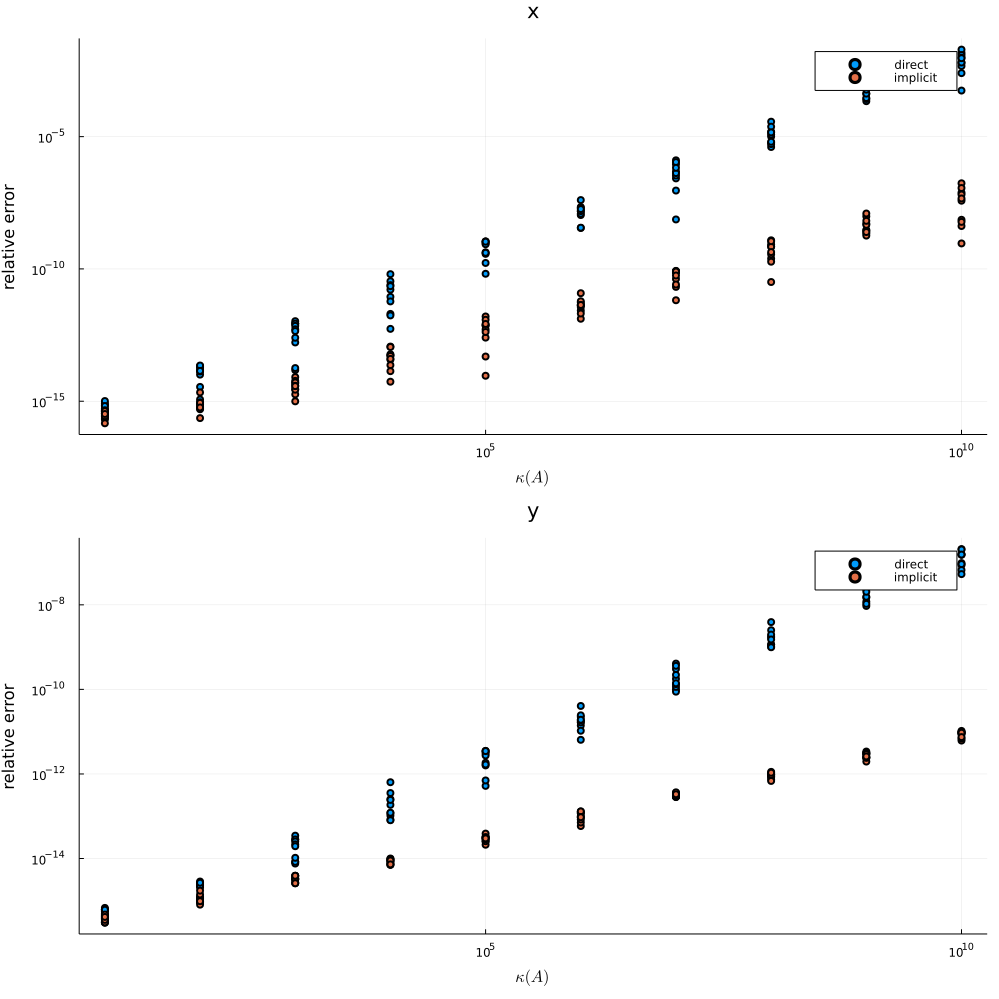

In [21]:
p1 = plot(axis,hcat(xerr_dir,xerr_imp), title = "x", seriestype = :scatter, xaxis=:log, yaxis=:log, xlabel = L"\kappa(A)", ylabel="relative error",label = ["direct" "implicit"])
p2 = plot(axis,hcat(yerr_dir,yerr_imp), title = "y", seriestype = :scatter, xaxis=:log, yaxis=:log, xlabel = L"\kappa(A)", ylabel="relative error",label = ["direct" "implicit"])
plot(p1,p2, layout=(2,1),size = (1000,1000))